In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.7.0'

# 케라스의 순환 층 : SimpleRNN

- 시퀀스 배치를 처리 : (batch_size, timesteps, input_features) 크기의 입력을 받음
- 두 가지 모드로 실행: return_sequences로 선택
  - 각 타임스텝의 출력을 모은 전체 시퀀스를 반환: 크기가 (batch_size, timesteps, output_features) 3D 텐서, : return_sequences=True
  - 입력 시퀀스에 대한 마지막 출력만 반환 : 크기가 (batch_size, output_features)인 2D 텐서


### 예제1. SimpleRNN을 사용하여 마지막 타임스텝의 출력 얻기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### 예제2. SimpleRNN을 사용하여 전체 상태 시퀀스 반환

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### 예제3. 여러 개의 순환층을 사용한 RNN 모델
- 중간층들이 전체 출력 시퀀스를 반환하도록 설정해야 함

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## IMDB 영화리뷰 분류를 위한 RNN : SimpleRNN 층 사용

### 1) imdb 데이터 로딩 및 데이터 전처리


In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩(samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩(samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


### 2) IMDB 분류를 위한 간단한 순환 신경망 정의 및 컴파일

In [6]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

### 3) 순환신경망 훈련

In [7]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

2022-03-25 11:12:12.081479: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
157/157 [==============================] - 12s 71ms/step - loss: 0.6318 - acc: 0.6265 - val_loss: 0.4799 - val_acc: 0.7896
Epoch 2/10
157/157 [==============================] - 11s 70ms/step - loss: 0.3952 - acc: 0.8332 - val_loss: 0.3793 - val_acc: 0.8398
Epoch 3/10
157/157 [==============================] - 11s 72ms/step - loss: 0.2792 - acc: 0.8898 - val_loss: 0.4464 - val_acc: 0.7914
Epoch 4/10
157/157 [==============================] - 11s 73ms/step - loss: 0.2093 - acc: 0.9216 - val_loss: 0.4016 - val_acc: 0.8396
Epoch 5/10
157/157 [==============================] - 11s 70ms/step - loss: 0.1815 - acc: 0.9319 - val_loss: 0.4650 - val_acc: 0.8262
Epoch 6/10
157/157 [==============================] - 11s 69ms/step - loss: 0.1116 - acc: 0.9622 - val_loss: 0.4942 - val_acc: 0.8098
Epoch 7/10
157/157 [==============================] - 11s 68ms/step - loss: 0.0691 - acc: 0.9772 - val_loss: 0.4520 - val_acc: 0.8592
Epoch 8/10
157/157 [==============================] - 11s 68ms

In [12]:
from tensorflow.keras import callbacks, optimizers

rmsprop = optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = callbacks.ModelCheckpoint('model/best-simplernn-model2.h5')
early_stopping_cb = callbacks.EarlyStopping(patience=3,
                                            restore_best_weights=True)
history = model.fit(input_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
157/157 [==============================] - 11s 70ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.7083 - val_accuracy: 0.8158
Epoch 2/50
157/157 [==============================] - 11s 69ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.7112 - val_accuracy: 0.8216
Epoch 3/50
157/157 [==============================] - 11s 69ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.7161 - val_accuracy: 0.8296
Epoch 4/50
157/157 [==============================] - 11s 68ms/step - loss: 9.3233e-04 - accuracy: 0.9999 - val_loss: 0.7789 - val_accuracy: 0.8134


### 4)  순환 신경망 모델의 성능(훈련, 검증의 손실과 정확도) 시각화

In [9]:
import matplotlib.pyplot as plt

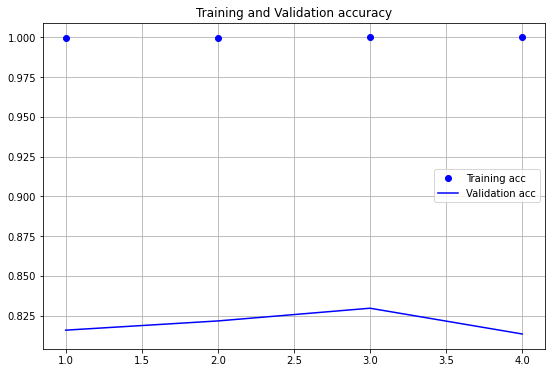

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.grid()
plt.legend()
plt.show()

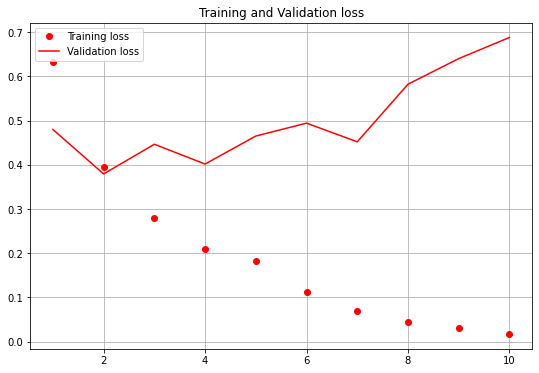

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.grid()
plt.legend()
plt.show()

#### 모델 테스트

In [14]:
rnn_model = keras.models.load_model('model/best-simplernn-model2.h5')

rnn_model.evaluate(input_test, y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.7847 - accuracy: 0.8074


[0.7846803069114685, 0.8074399828910828]